### The Problem:
    
- Olist is an online seller in Brazil. They are opening a new retail outlet. Before they open the store to the genral public, they wish to run a soft opening with a select few customers. How do we select those customers?
- We can do a RFM segmentation and select the most appropriate segment for our soft opening.

### Importing packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from scipy import stats
from datetime import date,timedelta
from matplotlib import pyplot as plt

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading data

In [2]:
orders = pd.read_csv('D:\\Praxis\\ML\\data\\olist_orders_dataset.csv')
payments = pd.read_csv('D:\\Praxis\\ML\\data\\olist_order_payments_dataset.csv')


### Looking at data

In [3]:
orders.shape

(99441, 8)

In [4]:
payments.shape

(103886, 5)

In [5]:
orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
25135,edc07d2563b2d10bdf1a0376f65b8f76,acd35d862cfc0c1741ab3d368c4d341b,delivered,2018-08-01 21:40:21,2018-08-03 02:50:29,2018-08-06 13:29:00,2018-08-09 16:48:54,2018-08-14 00:00:00
10669,785d9cc9690385fee964390cf2038b17,9032c3b04eb2b425e8fd7ca5fa908de7,delivered,2017-03-01 15:17:51,2017-03-01 15:30:21,2017-03-03 09:27:35,2017-03-13 08:51:53,2017-03-22 00:00:00


In [6]:
payments.sample(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
2728,72720cd963d6632b6d378ca9baca8963,1,credit_card,10,204.96
42876,60bb02359df66816035993b8130945e7,1,credit_card,1,84.23


### Filtering by order_id

In [7]:
payments[payments['order_id'] == '3f26faa9494be61027d0c04483436498']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
73414,3f26faa9494be61027d0c04483436498,1,credit_card,2,46.39


In [8]:
orders[orders['order_id'] == '3f26faa9494be61027d0c04483436498']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
34745,3f26faa9494be61027d0c04483436498,2bfbff5eb42c14a3ed9e37efbf840e33,delivered,2018-03-23 09:34:43,2018-03-23 09:50:37,2018-03-23 22:09:45,2018-03-26 23:28:46,2018-04-05 00:00:00


### Checking distinct ids in payments and orders

In [9]:
len(payments['order_id'].unique())

99440

In [10]:
len(orders['order_id'].unique())

99441

### Looking at order_statuses

In [11]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [12]:
orders_delivered = orders[orders['order_status'] == 'delivered']

In [13]:
orders_delivered.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26603,e2abaacfbaa87cb128b9c6675bcd2b98,d8c600db799de9c8c959530c4c5976ed,delivered,2017-12-15 16:06:37,2017-12-19 09:59:28,2017-12-19 19:19:35,2018-01-08 21:39:26,2018-01-15 00:00:00
96802,c97b96669af0b8d42bb6991c545614c3,39ec404a2e815f1d1a700c3df2aba180,delivered,2017-02-23 15:29:01,2017-02-23 15:42:20,2017-02-24 13:24:37,2017-03-01 13:17:39,2017-03-16 00:00:00


### Merging orders and payments tables

In [14]:
#orders_delivered.join(payments, on = 'order_id', how = 'inner')
data = pd.merge(orders_delivered,payments, how = 'inner', on = 'order_id')

In [15]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...
100751,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,1,credit_card,3,85.08
100752,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,3,195.00
100753,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,5,271.01
100754,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,4,441.16


### Creating RFM dataframe

In [16]:
data['payment_value'].describe()

count    100756.000000
mean        153.067428
std         214.451418
min           0.000000
25%          56.780000
50%         100.000000
75%         171.290000
max       13664.080000
Name: payment_value, dtype: float64

### checking for null values

In [17]:
sum(data['order_delivered_carrier_date'].isna())

2

In [18]:
sum(data['order_delivered_customer_date'].isna())

8

In [19]:
data[data['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
3070,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00,1,credit_card,3,134.83
20914,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00,1,debit_card,1,354.24
44472,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,1,credit_card,3,158.07
80287,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00,1,credit_card,1,158.07
83916,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00,1,credit_card,4,204.62
93850,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00,1,credit_card,4,194.00
98916,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00,1,credit_card,5,120.12
99315,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00,1,credit_card,1,54.97


### Imputing missing values

In [20]:
data[data['order_delivered_customer_date'].isna()]['order_estimated_delivery_date']

3070     2017-12-18 00:00:00
20914    2018-07-16 00:00:00
44472    2018-07-30 00:00:00
80287    2018-07-30 00:00:00
83916    2018-07-24 00:00:00
93850    2017-06-23 00:00:00
98916    2018-06-26 00:00:00
99315    2018-07-19 00:00:00
Name: order_estimated_delivery_date, dtype: object

In [21]:
orders = list(data[data['order_delivered_customer_date'].isna()]['order_id'])
orders

['2d1e2d5bf4dc7227b3bfebb81328c15f',
 'f5dd62b788049ad9fc0526e3ad11a097',
 '2ebdfc4f15f23b91474edf87475f108e',
 'e69f75a717d64fc5ecdfae42b2e8e086',
 '0d3268bad9b086af767785e3f0fc0133',
 '2d858f451373b04fb5c984a1cc2defaf',
 'ab7c89dc1bf4a1ead9d6ec1ec8968a84',
 '20edc82cf5400ce95e1afacc25798b31']

In [22]:
for order in orders:
    data.loc[data['order_id'] == order,'order_delivered_customer_date'] = data[data['order_id'] == order]['order_estimated_delivery_date']

In [23]:
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

In [24]:
data['order_delivered_customer_date_first'] = data['order_delivered_customer_date']

### Create RFM Data set

In [25]:
last_date = data['order_delivered_customer_date'].max() + timedelta(days=1)
#order_payment = order_payment.reset_index()
rfm = data.groupby('customer_id').agg({
    'order_delivered_customer_date': lambda x: (last_date - x.max()).days,
    'order_id': lambda x: len(x),
    'order_delivered_customer_date' : lambda x : (last_date - x.min()).days,
    'payment_value': 'sum'
})

In [26]:
import copy
rfm1 = copy.deepcopy(rfm)

In [27]:
# chaning column names

rfm1 = rfm1.rename(columns={"order_delivered_customer_date": "recency", "order_id": "frequency",
                          'order_delivered_customer_date_first': 'first_purchase',"payment_value": "monetary"})

### Managerial Segmentation

In [28]:
rfm1.sample(5)

,recency,frequency,monetary
customer_id,,,
980b20bc28f32a212225725533892531,613,1,87.13
8eb5e45df7b0f27cc1a3b7ba46219180,360,1,126.11
efbad0e343e190019792deb0edcd832c,113,1,85.65
02033fca76b4af0eda65418e673b5a57,257,1,195.72
4446b59d06b177573bfebf6be6ff37a4,86,1,235.26


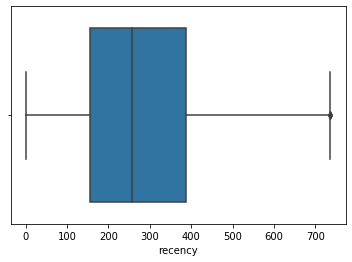

In [29]:
sns.boxplot(rfm1['recency'])

#### Recency

- active - 1 to 180 days
- warm - 180 to 365 days
- cold - 365 to 730 days
- inactive - > 730 days

### monetary value

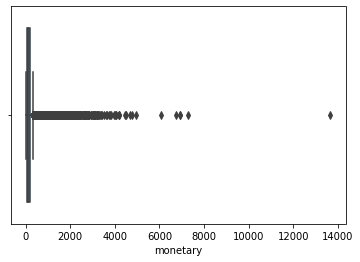

In [30]:
sns.boxplot(rfm1['monetary'])

In [31]:
rfm1['monetary'].describe()

count    96477.000000
mean       159.856357
std        218.813144
min          9.590000
25%         61.880000
50%        105.280000
75%        176.330000
max      13664.080000
Name: monetary, dtype: float64

- value < 62 - low
- 62 < value < 176 - medium
- value > 176 - high

In [32]:
rfm1.loc[rfm1.recency > 730 ,'segment'] = 'Inactive'
rfm1.loc[(rfm1.recency >365) & (rfm1.recency <= 730) ,'segment'] = 'Cold'
rfm1.loc[(rfm1.recency > 0) & (rfm1.recency <= 180) ,'segment'] = 'Active'
rfm1.loc[(rfm1.recency > 180) & (rfm1.recency <= 365) ,'segment'] = 'Warm'

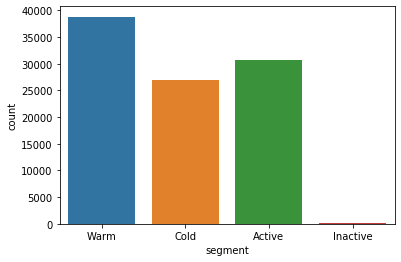

In [33]:
sns.countplot('segment', data = rfm1)

#sns.barplot()

In [34]:
rfm1.loc[(rfm1.segment == 'Active') & (rfm1.monetary < 62) ,'segment'] = 'Active - Low'
rfm1.loc[(rfm1.segment == 'Active') & (rfm1.monetary >= 62) & (rfm1.monetary < 176) ,'segment'] = 'Active - Medium'
rfm1.loc[(rfm1.segment == 'Active') & (rfm1.monetary >= 176) ,'segment'] = 'Active - High'

rfm1.loc[(rfm1.segment == 'Warm') & (rfm1.monetary < 62) ,'segment'] = 'Warm - Low'
rfm1.loc[(rfm1.segment == 'Warm') & (rfm1.monetary >= 62) & (rfm1.monetary < 176) ,'segment'] = 'Warm - Medium'
rfm1.loc[(rfm1.segment == 'Warm') & (rfm1.monetary >= 176) ,'segment'] = 'Warm - High'

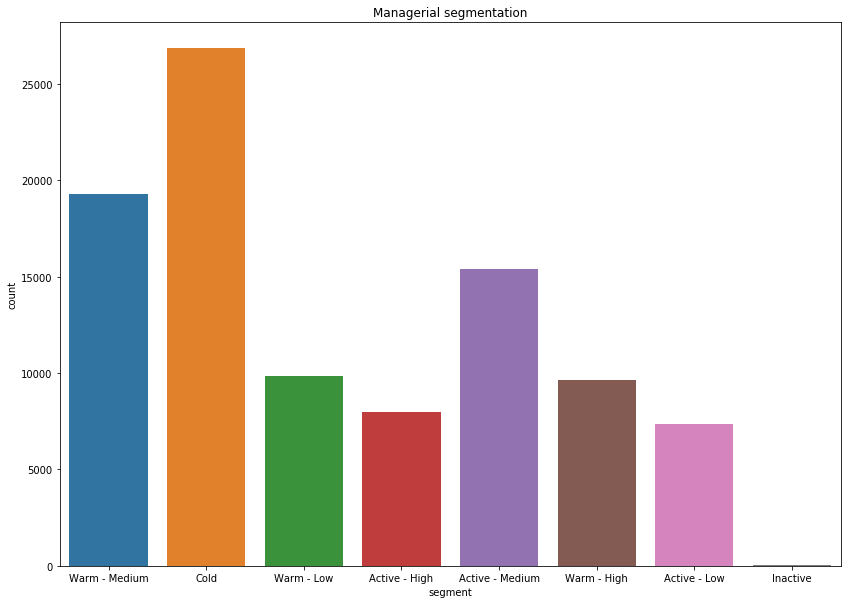

In [35]:
plt.figure(figsize = (14,10))
plt.title('Managerial segmentation')
sns.countplot('segment', data = rfm1)

In [36]:
len(rfm1[(rfm1['segment'] == 'Active - Low') & (rfm1.frequency > 2)])

37

In [38]:
len(rfm1[(rfm1['segment'] == 'Active - Medium') & (rfm1.frequency >= 2)])

374

There are 411 customers who are active, buy frequently and are loyal to us. So we could run our soft event with there people. Some minor issues that may happen during our soft event may be excused by them. We could offer them some incentives to come to our event like discounts, cashbacks, coupons etc. We can ask them for feedback and spread the word to their friends and family. 

We are not selecting out active high customer base since they are extremely valuable to us and we don't want to take any risks with testing our new store with them. 